In [74]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [75]:
# Load SENSEX (BSE) datasets historical data (01/04/2023 - 31/03/2025)
reliance_bse = pd.read_csv("C:\\Users\\AMAN KUMAR  SINGH\\OneDrive\\Desktop\\NTCC\\data set\\BSE\\Reliance Industries Ltd (BSE).csv")
hdfcbank_bse = pd.read_csv("C:\\Users\\AMAN KUMAR  SINGH\\OneDrive\\Desktop\\NTCC\\data set\\BSE\\HDFC Bank Ltd (BSE).csv")
infy_bse = pd.read_csv("C:\\Users\\AMAN KUMAR  SINGH\\OneDrive\\Desktop\\NTCC\\data set\\BSE\\Infosys Ltd (BSE).csv")
tcs_bse = pd.read_csv("C:\\Users\\AMAN KUMAR  SINGH\\OneDrive\\Desktop\\NTCC\\data set\\BSE\\Tata Consultancy Services Ltd (BSE).csv")

In [76]:
# Load NIFTY (NSE) datasets historical data (01/04/2023 - 31/03/2025)
reliance_nse = pd.read_csv("C:\\Users\\AMAN KUMAR  SINGH\\OneDrive\\Desktop\\NTCC\\data set\\NSE\\Reliance Industries Ltd (NSE).csv")
hdfcbank_nse = pd.read_csv("C:\\Users\\AMAN KUMAR  SINGH\\OneDrive\\Desktop\\NTCC\\data set\\NSE\\HDFC Bank Ltd (NSE).csv")
infy_nse = pd.read_csv("C:\\Users\\AMAN KUMAR  SINGH\\OneDrive\\Desktop\\NTCC\\data set\\NSE\\Infosys Ltd (NSE).csv")
tcs_nse = pd.read_csv("C:\\Users\\AMAN KUMAR  SINGH\\OneDrive\\Desktop\\NTCC\\data set\\NSE\\Tata Consultancy Services Ltd (NSE).csv")

In [77]:
reliance_bse.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,28-March-2025,1279.30,1295.70,1269.05,1275.00,1280.164162,987799,24092,1.264545e+09,580124,58.73,26.65,-4.30
1,27-March-2025,1275.05,1285.15,1272.05,1278.40,1279.554705,278220,6731,3.559977e+08,169525,60.93,13.10,3.35
2,26-March-2025,1290.25,1293.95,1269.00,1272.55,1281.415763,658347,9779,8.436162e+08,507412,77.07,24.95,-17.70
3,25-March-2025,1307.00,1307.00,1283.00,1285.40,1289.392360,865836,23947,1.116402e+09,504707,58.29,24.00,-21.60
4,24-March-2025,1286.40,1305.30,1281.00,1301.35,1298.036675,861533,26632,1.118301e+09,514147,59.68,24.30,14.95


In [78]:
def filter_stock_columns(df, ticker, exchange):
    # Standardize column names
    df.columns = df.columns.str.strip().str.upper()
    
    # Rename common column name variations
    rename_map = {
        'OPEN PRICE': 'OPEN',
        'HIGH PRICE': 'HIGH',
        'LOW PRICE': 'LOW',
        'CLOSE PRICE': 'CLOSE',
        'LAST TRADED PRICE': 'CLOSE',
        'TIMESTAMP': 'DATE',
    }
    df.rename(columns=rename_map, inplace=True)
    
    # Parse DATE
    if 'DATE' in df.columns:
        df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
    else:
        print(f"[WARNING] No DATE column found for {ticker} ({exchange})")
    
    # Columns to retain
    required_columns = ['DATE','OPEN', 'HIGH', 'LOW', 'CLOSE']
    present_columns = [col for col in required_columns if col in df.columns]

    # Remove commas and convert price columns to float
    for col in ['OPEN', 'HIGH', 'LOW', 'CLOSE']:
        if col in df.columns:
            df[col] = df[col].astype(str).str.replace(',', '').astype(float)
    
    # Filter and drop rows with missing values
    filtered_df = df[present_columns].dropna()
    
    # Add metadata
    filtered_df['TICKER'] = ticker
    filtered_df['EXCHANGE'] = exchange
    
    return filtered_df


# Apply to all your datasets
df_reliance_bse_filtered = filter_stock_columns(reliance_bse, 'RELIANCE', 'BSE')
df_hdfcbank_bse_filtered = filter_stock_columns(hdfcbank_bse, 'HDFCBANK', 'BSE')
df_infy_bse_filtered = filter_stock_columns(infy_bse, 'INFOSYS', 'BSE')
df_tcs_bse_filtered = filter_stock_columns(tcs_bse, 'TCS', 'BSE')

df_reliance_nse_filtered = filter_stock_columns(reliance_nse, 'RELIANCE', 'NSE')
df_hdfcbank_nse_filtered = filter_stock_columns(hdfcbank_nse, 'HDFCBANK', 'NSE')
df_infy_nse_filtered = filter_stock_columns(infy_nse, 'INFOSYS', 'NSE')
df_tcs_nse_filtered = filter_stock_columns(tcs_nse, 'TCS', 'NSE')


C:\Users\AMAN KUMAR  SINGH\AppData\Local\Temp\ipykernel_21852\1024638900.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
C:\Users\AMAN KUMAR  SINGH\AppData\Local\Temp\ipykernel_21852\1024638900.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
C:\Users\AMAN KUMAR  SINGH\AppData\Local\Temp\ipykernel_21852\1024638900.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
C:\Users\AMAN KUMAR  SINGH\AppD

In [79]:
df_reliance_bse_filtered

,DATE,OPEN,HIGH,LOW,CLOSE,TICKER,EXCHANGE
0,2025-03-28,1279.30,1295.70,1269.05,1275.00,RELIANCE,BSE
1,2025-03-27,1275.05,1285.15,1272.05,1278.40,RELIANCE,BSE
2,2025-03-26,1290.25,1293.95,1269.00,1272.55,RELIANCE,BSE
3,2025-03-25,1307.00,1307.00,1283.00,1285.40,RELIANCE,BSE
4,2025-03-24,1286.40,1305.30,1281.00,1301.35,RELIANCE,BSE
...,...,...,...,...,...,...,...
490,2023-04-11,2330.00,2341.00,2324.00,2336.30,RELIANCE,BSE
491,2023-04-10,2346.00,2350.40,2321.90,2324.60,RELIANCE,BSE
492,2023-04-06,2320.00,2354.50,2318.05,2341.00,RELIANCE,BSE
493,2023-04-05,2341.75,2346.60,2308.50,2325.50,RELIANCE,BSE


In [80]:
df_reliance_nse_filtered

,DATE,OPEN,HIGH,LOW,CLOSE,TICKER,EXCHANGE
0,2025-03-28,1280.00,1295.75,1269.00,1275.10,RELIANCE,NSE
1,2025-03-27,1278.15,1285.00,1271.30,1278.20,RELIANCE,NSE
2,2025-03-26,1291.00,1293.80,1268.75,1273.05,RELIANCE,NSE
3,2025-03-25,1307.70,1307.70,1282.60,1285.45,RELIANCE,NSE
4,2025-03-24,1291.00,1306.00,1284.25,1302.10,RELIANCE,NSE
...,...,...,...,...,...,...,...
490,2023-04-11,2334.00,2341.00,2324.05,2336.35,RELIANCE,NSE
491,2023-04-10,2350.00,2350.40,2321.55,2324.85,RELIANCE,NSE
492,2023-04-06,2318.15,2354.00,2318.15,2341.45,RELIANCE,NSE
493,2023-04-05,2348.00,2348.00,2308.55,2325.85,RELIANCE,NSE


In [81]:
# Combine all into one dataset
combined_df = pd.concat([
    df_reliance_bse_filtered, df_hdfcbank_bse_filtered, df_infy_bse_filtered, df_tcs_bse_filtered,
    df_reliance_nse_filtered, df_hdfcbank_nse_filtered, df_infy_nse_filtered, df_tcs_nse_filtered
], ignore_index=True)

# Preview combined data
print(combined_df.head())


        DATE     OPEN     HIGH      LOW    CLOSE    TICKER EXCHANGE
0 2025-03-28  1279.30  1295.70  1269.05  1275.00  RELIANCE      BSE
1 2025-03-27  1275.05  1285.15  1272.05  1278.40  RELIANCE      BSE
2 2025-03-26  1290.25  1293.95  1269.00  1272.55  RELIANCE      BSE
3 2025-03-25  1307.00  1307.00  1283.00  1285.40  RELIANCE      BSE
4 2025-03-24  1286.40  1305.30  1281.00  1301.35  RELIANCE      BSE


In [82]:
combined_reliance = pd.concat([df_reliance_bse_filtered, df_reliance_nse_filtered]) 
combined_hdfcbank = pd.concat([df_hdfcbank_bse_filtered, df_hdfcbank_nse_filtered]) 
combined_infy = pd.concat([df_infy_bse_filtered, df_infy_nse_filtered]) 
combined_tcs = pd.concat([df_tcs_bse_filtered, df_tcs_nse_filtered]) 

In [83]:
combined_BSE = pd.concat([df_reliance_bse_filtered, df_hdfcbank_bse_filtered, df_infy_bse_filtered, df_tcs_bse_filtered])
combined_NSE = pd.concat([df_reliance_nse_filtered, df_hdfcbank_nse_filtered, df_infy_nse_filtered, df_tcs_nse_filtered]) 

In [84]:
combined_reliance

,DATE,OPEN,HIGH,LOW,CLOSE,TICKER,EXCHANGE
0,2025-03-28,1279.30,1295.70,1269.05,1275.00,RELIANCE,BSE
1,2025-03-27,1275.05,1285.15,1272.05,1278.40,RELIANCE,BSE
2,2025-03-26,1290.25,1293.95,1269.00,1272.55,RELIANCE,BSE
3,2025-03-25,1307.00,1307.00,1283.00,1285.40,RELIANCE,BSE
4,2025-03-24,1286.40,1305.30,1281.00,1301.35,RELIANCE,BSE
...,...,...,...,...,...,...,...
490,2023-04-11,2334.00,2341.00,2324.05,2336.35,RELIANCE,NSE
491,2023-04-10,2350.00,2350.40,2321.55,2324.85,RELIANCE,NSE
492,2023-04-06,2318.15,2354.00,2318.15,2341.45,RELIANCE,NSE
493,2023-04-05,2348.00,2348.00,2308.55,2325.85,RELIANCE,NSE


### 1. Line Plot: Company-wise Closing Prices for BSE and NSE
* The line plots below show the closing price trends of the selected companies listed on the BSE and NSE. Each company exhibits consistent pricing behavior across both exchanges, reinforcing the decision to merge data for combined modeling.

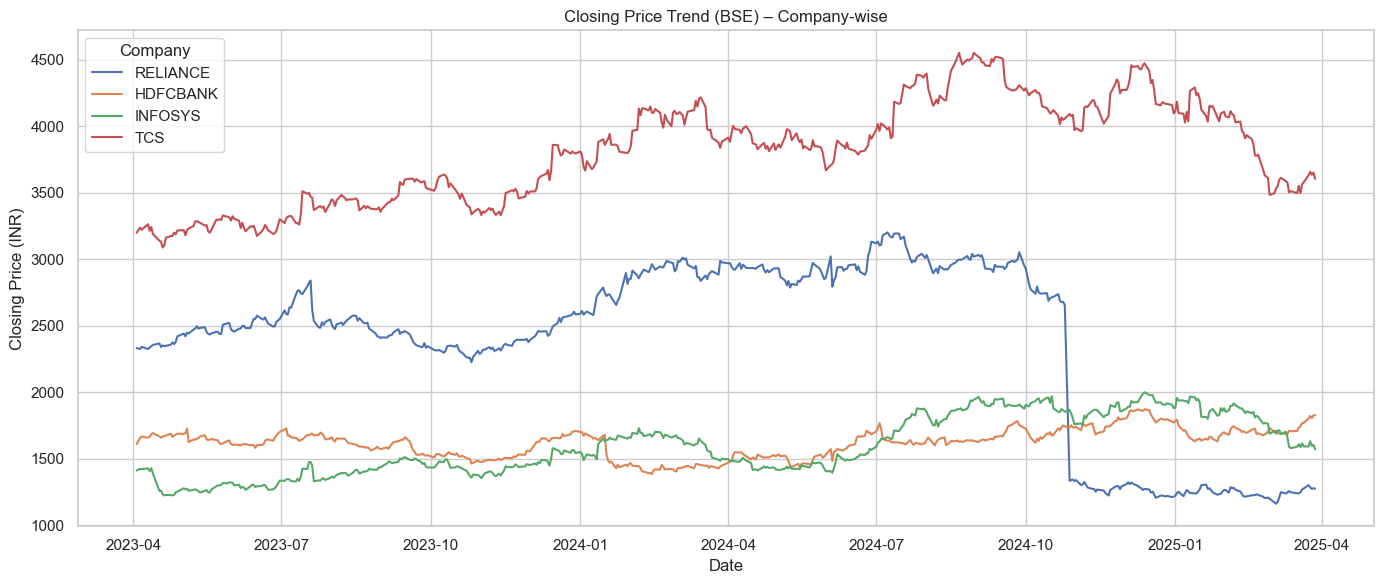

In [85]:
# Line Plot: Company-wise Closing Prices for BSE 
plt.figure(figsize=(14, 6))
sns.lineplot(data=combined_BSE, x='DATE', y='CLOSE', hue='TICKER')
plt.title('Closing Price Trend (BSE) – Company-wise')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.legend(title='Company')
plt.grid(True)
plt.tight_layout()
plt.show()


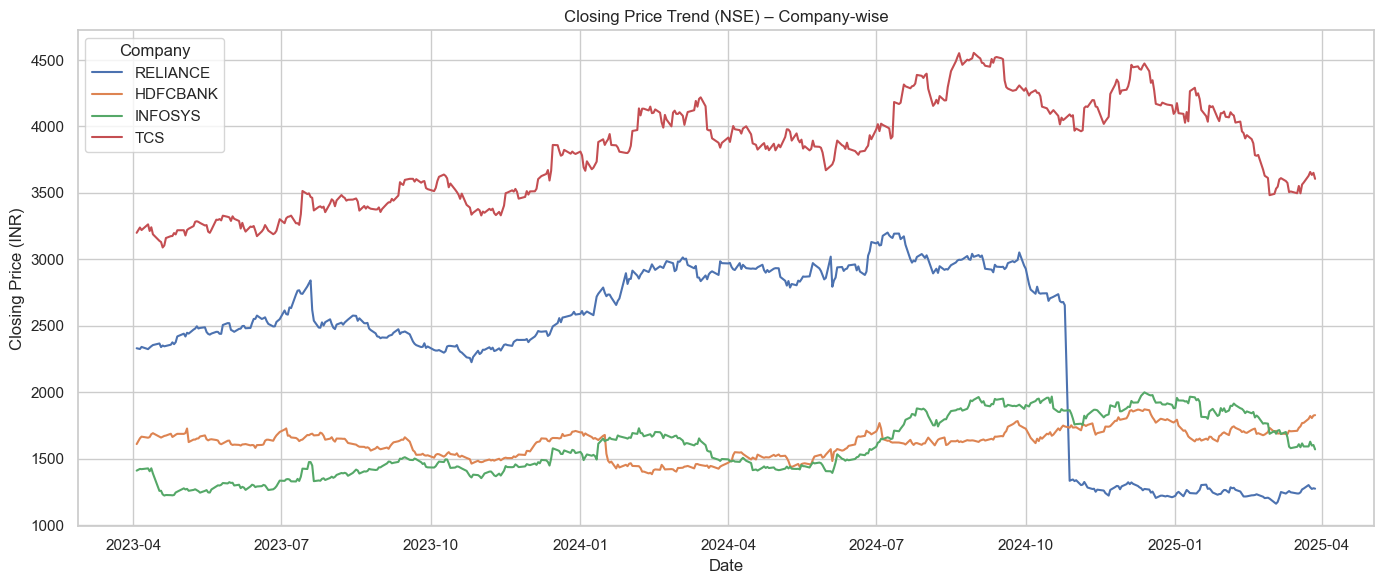

In [86]:
# Line Plot: Company-wise Closing Prices for BSE
plt.figure(figsize=(14, 6))
sns.lineplot(data=combined_NSE, x='DATE', y='CLOSE', hue='TICKER')
plt.title('Closing Price Trend (NSE) – Company-wise')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.legend(title='Company')
plt.grid(True)
plt.tight_layout()
plt.show()


### 2. Moving Average (Trend Smoothing)
* Add a 30-day moving average for smoother trend analysis
* Helps detect long-term vs short-term price trends.

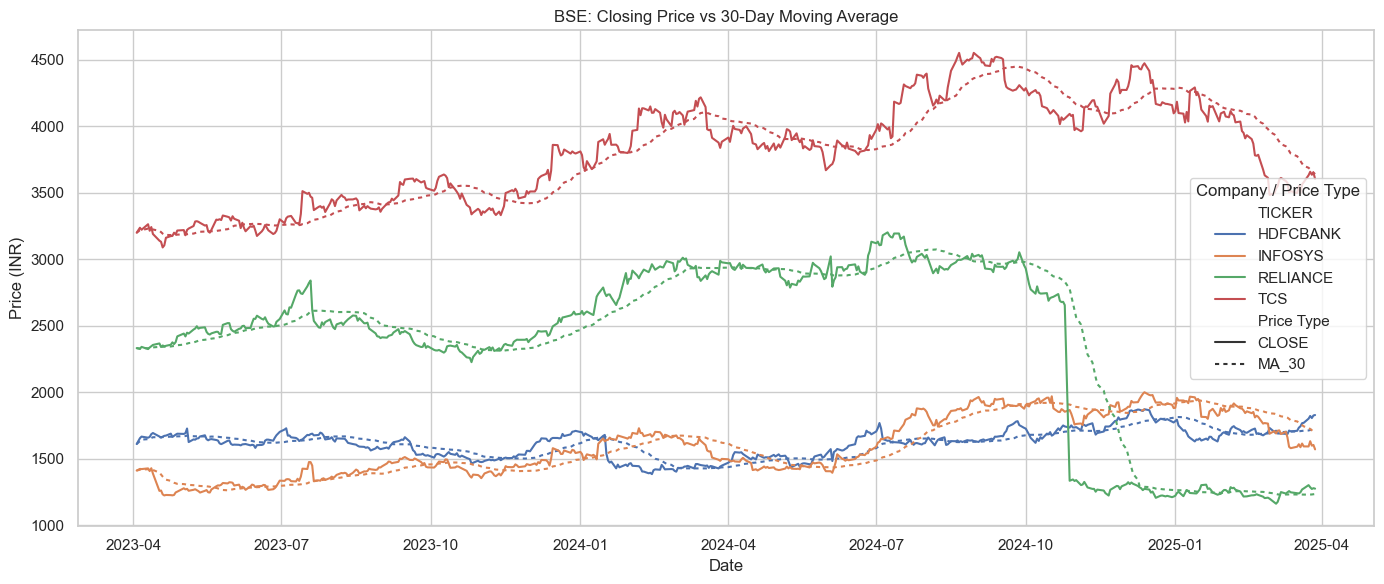

In [87]:
# Make sure MA_30 is calculated
combined_BSE = combined_BSE.sort_values(by=['TICKER', 'DATE'])
combined_BSE['MA_30'] = combined_BSE.groupby('TICKER')['CLOSE'].transform(lambda x: x.rolling(window=30, min_periods=1).mean())

# Reshape for plotting (melt the dataframe)
bse_long = pd.melt(
    combined_BSE,
    id_vars=['DATE', 'TICKER'],
    value_vars=['CLOSE', 'MA_30'],
    var_name='Price Type',
    value_name='Price'
)

# Plot with hue=TICKER and linestyle for MA/CLOSE
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=bse_long,
    x='DATE',
    y='Price',
    hue='TICKER',
    style='Price Type',  # Different linestyle for MA
    dashes={'CLOSE': '', 'MA_30': (2, 2)}  # solid for CLOSE, dashed for MA_30
)
plt.title('BSE: Closing Price vs 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.grid(True)
plt.legend(title='Company / Price Type')
plt.tight_layout()
plt.show()


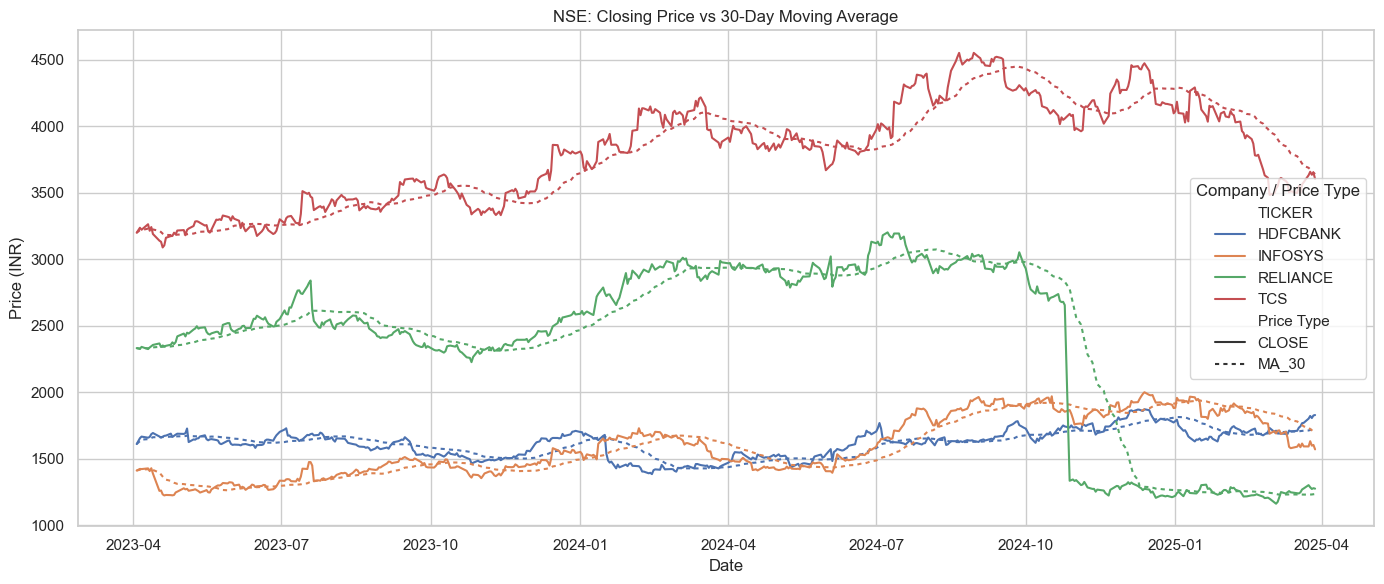

In [88]:
# Make sure MA_30 is calculated
combined_NSE = combined_NSE.sort_values(by=['TICKER', 'DATE'])
combined_NSE['MA_30'] = combined_NSE.groupby('TICKER')['CLOSE'].transform(lambda x: x.rolling(window=30, min_periods=1).mean())

# Reshape for plotting (melt the dataframe)
nse_long = pd.melt(
    combined_NSE,
    id_vars=['DATE', 'TICKER'],
    value_vars=['CLOSE', 'MA_30'],
    var_name='Price Type',
    value_name='Price'
)

# Plot with hue=TICKER and linestyle for MA/CLOSE
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=bse_long,
    x='DATE',
    y='Price',
    hue='TICKER',
    style='Price Type',  # Different linestyle for MA
    dashes={'CLOSE': '', 'MA_30': (2, 2)}  # solid for CLOSE, dashed for MA_30
)
plt.title('NSE: Closing Price vs 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.grid(True)
plt.legend(title='Company / Price Type')
plt.tight_layout()
plt.show()


### 3. Daily Returns (Volatility Insight)
* Shows how much a stock fluctuates daily.

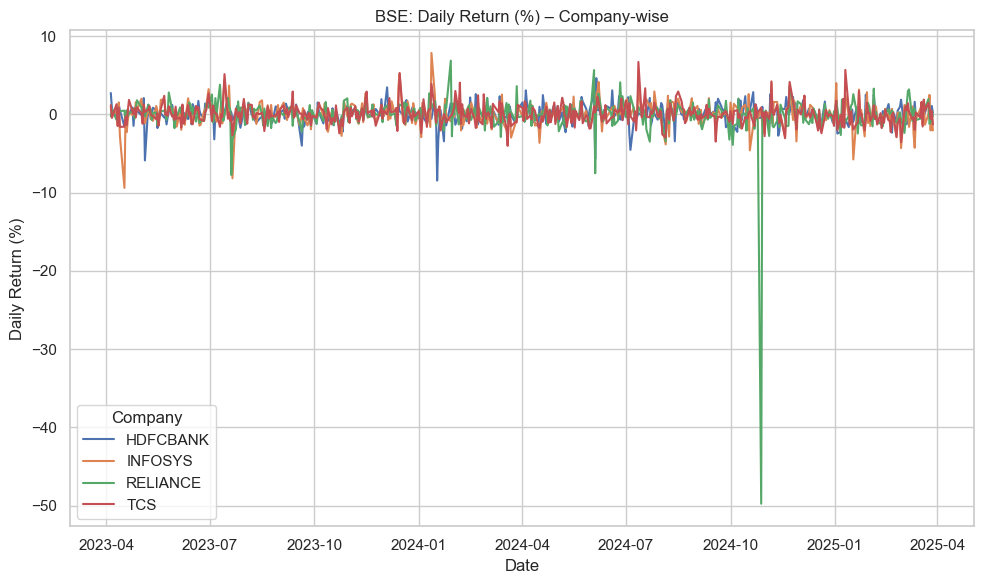

In [89]:
# Ensure unique index
combined_BSE = combined_BSE.reset_index(drop=True)

# Calculate daily return as % change in closing prices
combined_BSE['DAILY_RETURN'] = combined_BSE.groupby('TICKER')['CLOSE'].pct_change() * 100

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_BSE, x='DATE', y='DAILY_RETURN', hue='TICKER')
plt.title('BSE: Daily Return (%) – Company-wise')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.grid(True)
plt.legend(title='Company')
plt.tight_layout()
plt.show()


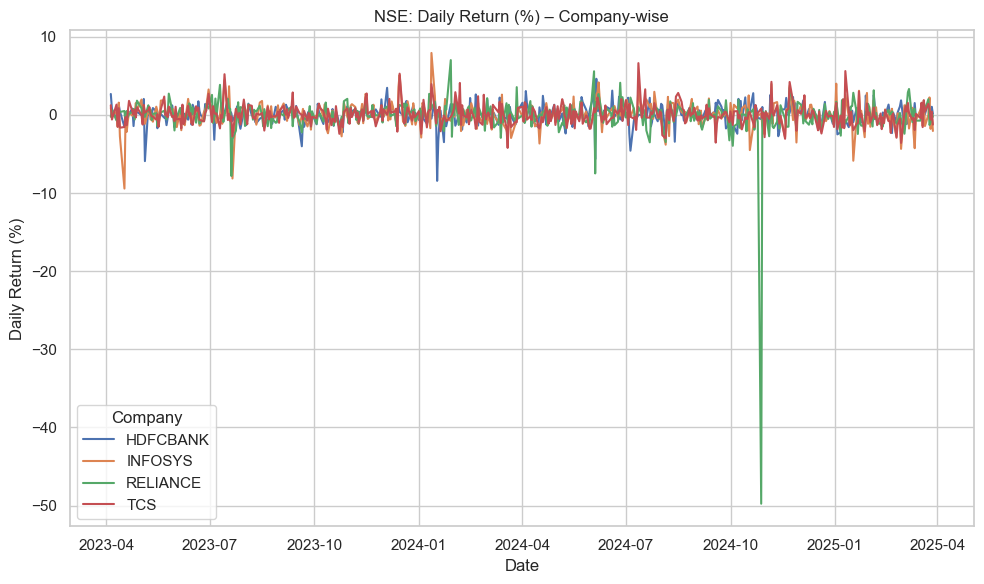

In [90]:
# Ensure unique index
combined_NSE = combined_NSE.reset_index(drop=True)

# Calculate daily return as % change in closing prices
combined_NSE['DAILY_RETURN'] = combined_NSE.groupby('TICKER')['CLOSE'].pct_change() * 100

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_NSE, x='DATE', y='DAILY_RETURN', hue='TICKER')
plt.title('NSE: Daily Return (%) – Company-wise')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.grid(True)
plt.legend(title='Company')
plt.tight_layout()
plt.show()


### 4. Volatility (Standard Deviation of Returns)
* Quantifies risk. High = more volatile.

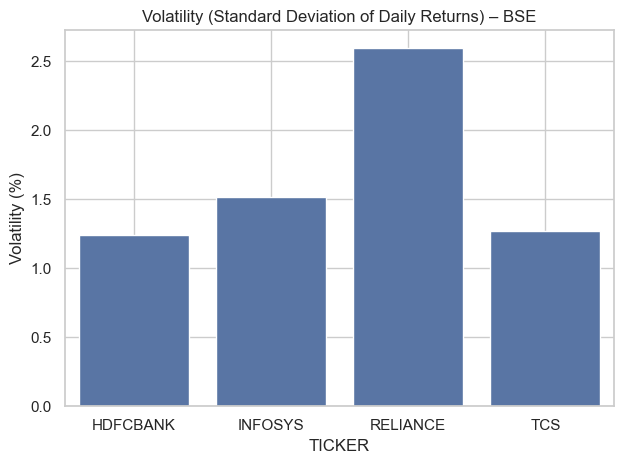

In [91]:
volatility_bse = combined_BSE.groupby('TICKER')['DAILY_RETURN'].std().reset_index().rename(columns={'DAILY_RETURN': 'VOLATILITY'})
sns.barplot(data=volatility_bse, x='TICKER', y='VOLATILITY')
plt.title('Volatility (Standard Deviation of Daily Returns) – BSE')
plt.ylabel('Volatility (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


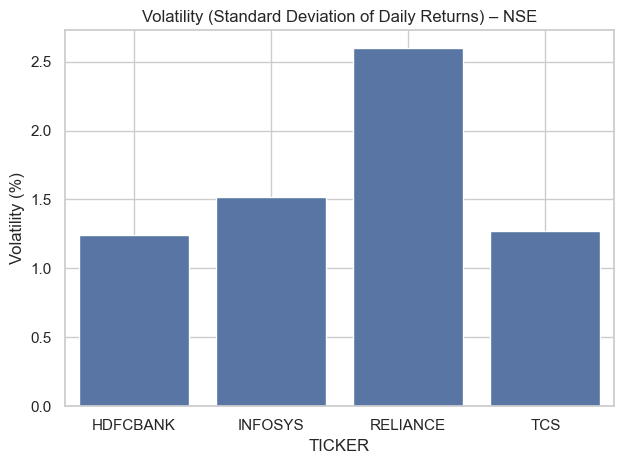

In [92]:
volatility_nse = combined_NSE.groupby('TICKER')['DAILY_RETURN'].std().reset_index().rename(columns={'DAILY_RETURN': 'VOLATILITY'})
sns.barplot(data=volatility_nse, x='TICKER', y='VOLATILITY')
plt.title('Volatility (Standard Deviation of Daily Returns) – NSE')
plt.ylabel('Volatility (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


### 5. Correlation Between Companies
* Reveals if companies move together. 

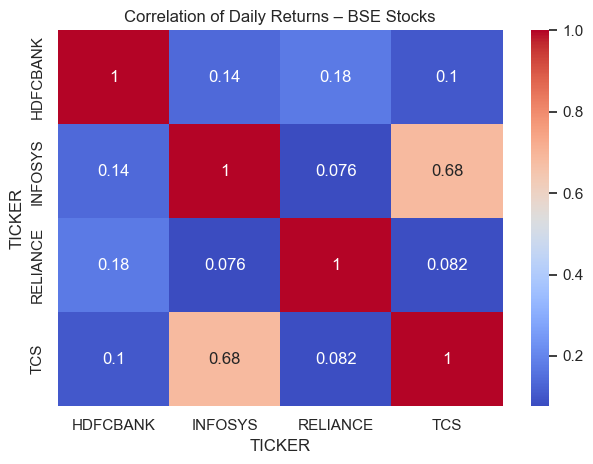

In [93]:
pivot_data = combined_BSE.pivot(index='DATE', columns='TICKER', values='CLOSE')
correlation_matrix = pivot_data.pct_change().corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation of Daily Returns – BSE Stocks')
plt.tight_layout()
plt.show()


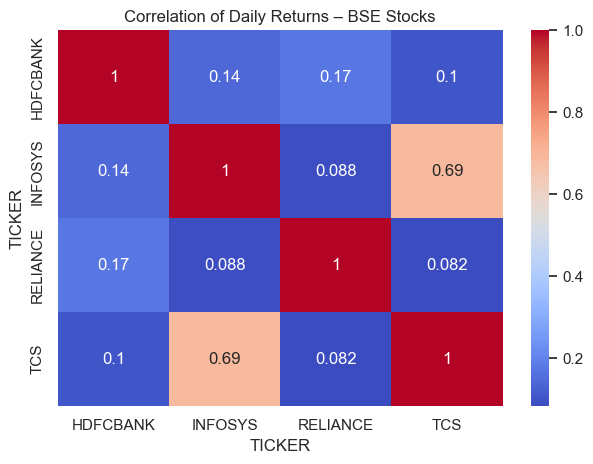

In [94]:
pivot_data = combined_NSE.pivot(index='DATE', columns='TICKER', values='CLOSE')
correlation_matrix = pivot_data.pct_change().corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation of Daily Returns – BSE Stocks')
plt.tight_layout()
plt.show()


### Box Plot of Returns (Distribution)
* Visualizes spread and outliers of daily returns.

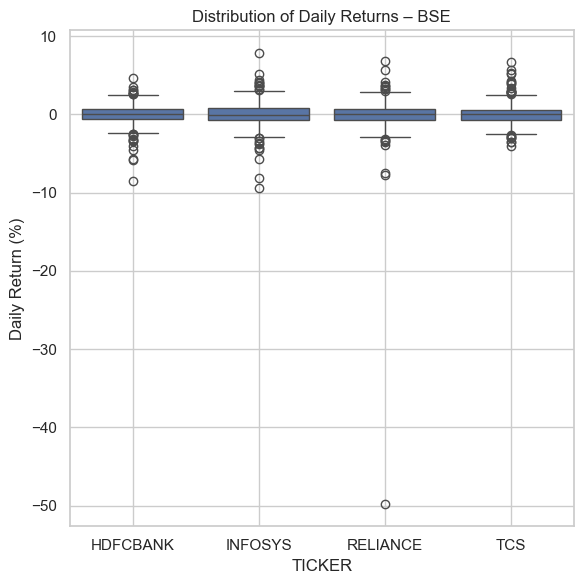

In [95]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=combined_BSE, x='TICKER', y='DAILY_RETURN')
plt.title('Distribution of Daily Returns – BSE')
plt.ylabel('Daily Return (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


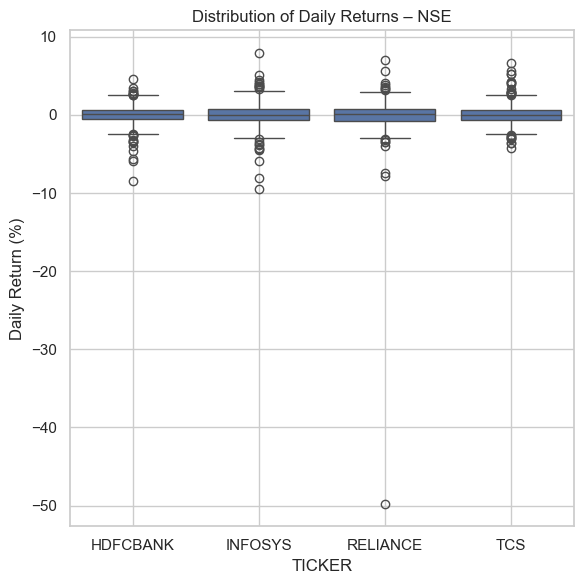

In [96]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=combined_NSE, x='TICKER', y='DAILY_RETURN')
plt.title('Distribution of Daily Returns – NSE')
plt.ylabel('Daily Return (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


###  Separate Histograms for Each Company

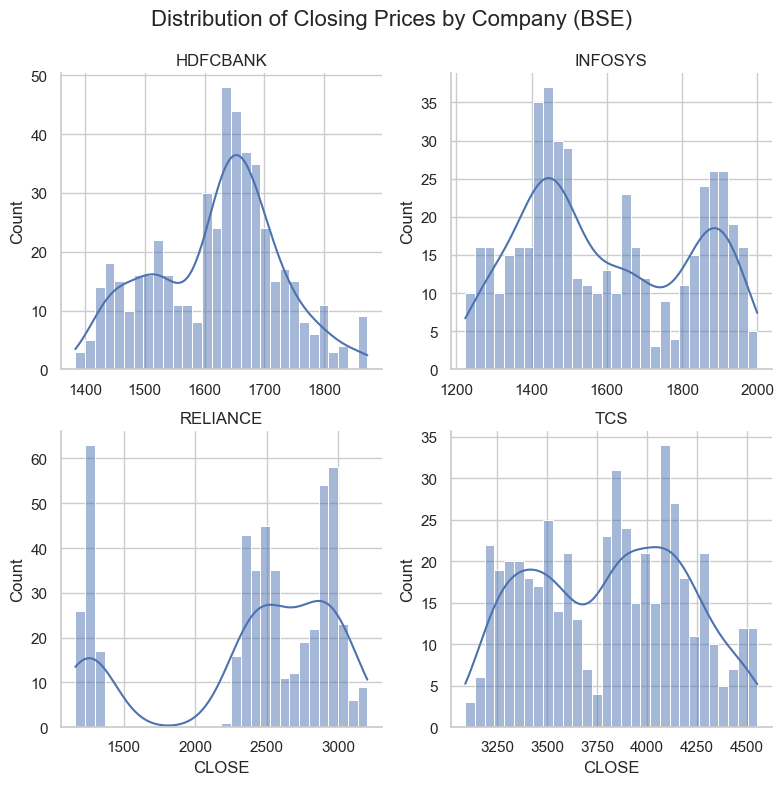

In [97]:
# histogram for BSE
g = sns.FacetGrid(combined_BSE, col="TICKER", col_wrap=2, height=4, sharex=False, sharey=False)
g.map(sns.histplot, "CLOSE", bins=30, kde=True)
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Closing Prices by Company (BSE)', fontsize=16)
plt.show()


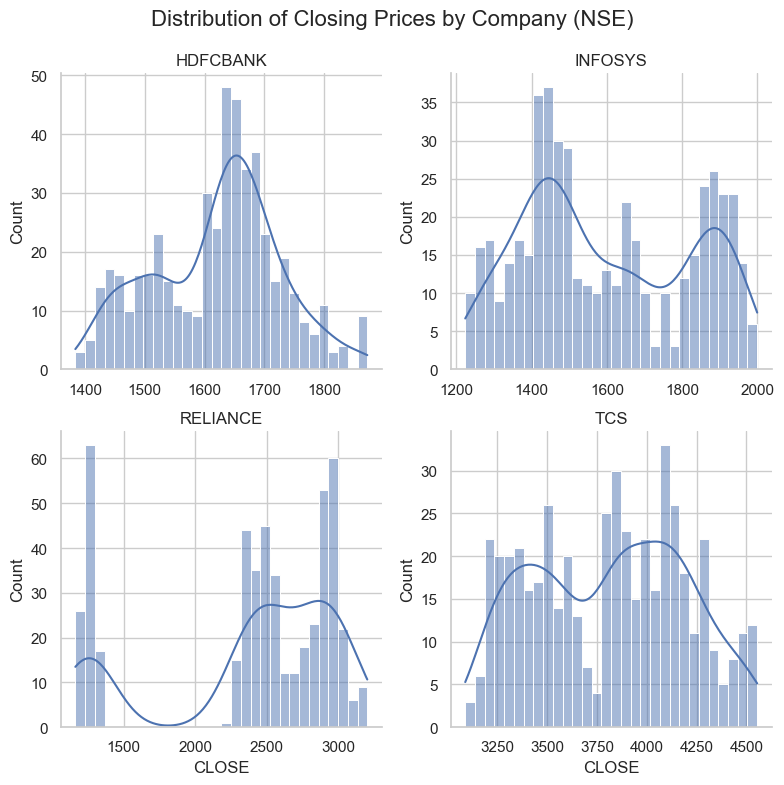

In [98]:
# histogram for NSE
g = sns.FacetGrid(combined_NSE, col="TICKER", col_wrap=2, height=4, sharex=False, sharey=False)
g.map(sns.histplot, "CLOSE", bins=30, kde=True)
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Closing Prices by Company (NSE)', fontsize=16)
plt.show()


### Distribution of Closing Prices – All Stocks (BSE & NSE)

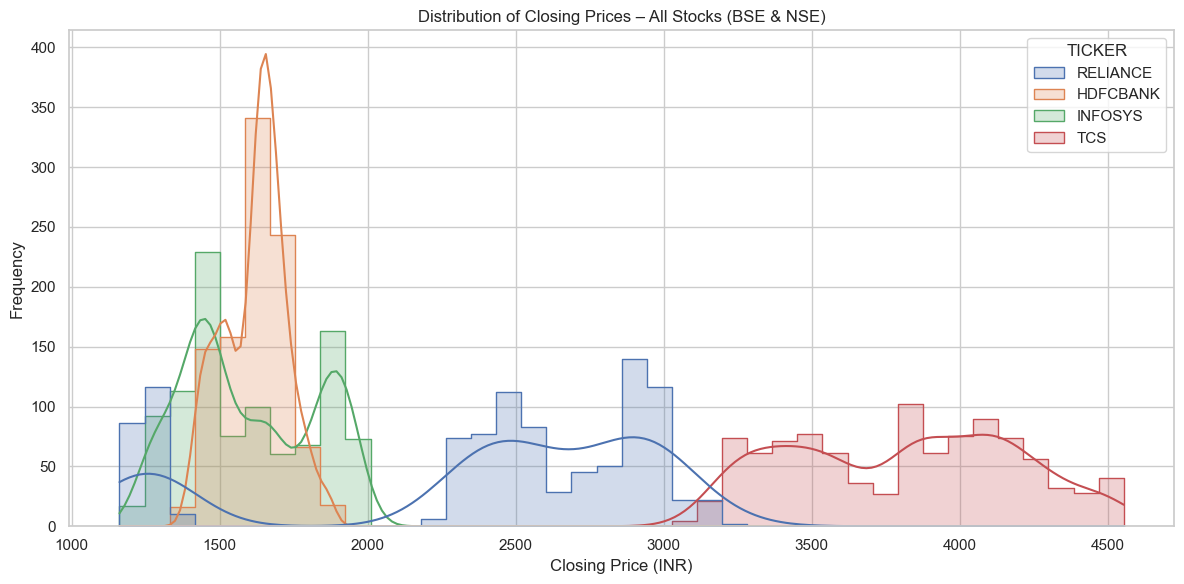

In [99]:
plt.figure(figsize=(12, 6))
sns.histplot(data=combined_df, x='CLOSE', hue='TICKER', bins=40, kde=True, element="step")
plt.title('Distribution of Closing Prices – All Stocks (BSE & NSE)')
plt.xlabel('Closing Price (INR)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


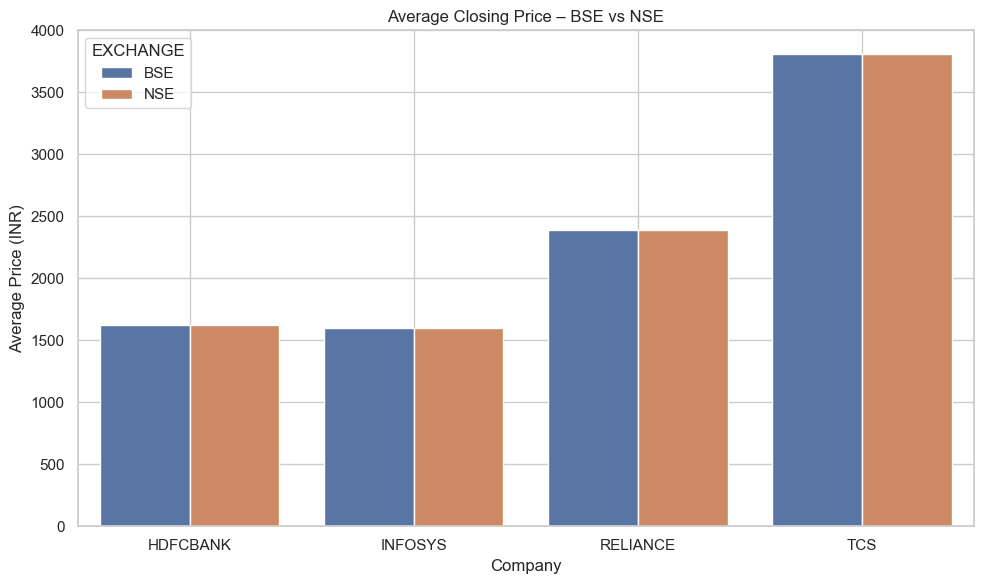

In [100]:
avg_price = combined_df.groupby(['TICKER', 'EXCHANGE'])['CLOSE'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price, x='TICKER', y='CLOSE', hue='EXCHANGE')
plt.title('Average Closing Price – BSE vs NSE')
plt.xlabel('Company')
plt.ylabel('Average Price (INR)')
plt.tight_layout()
plt.grid(True)
plt.show()


C:\Users\AMAN KUMAR  SINGH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\AMAN KUMAR  SINGH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1400x700 with 0 Axes>

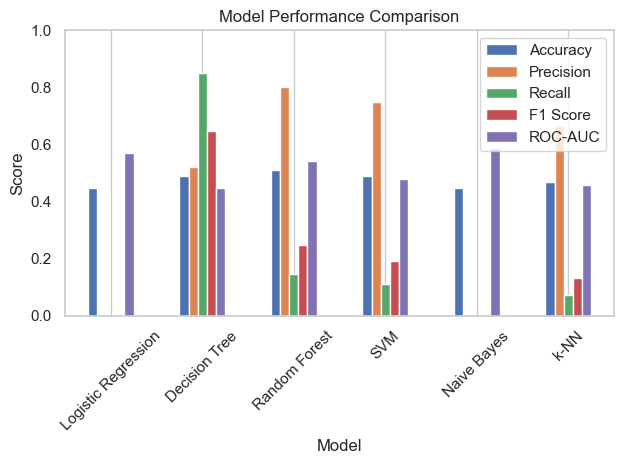

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
1,Decision Tree,0.489796,0.522727,0.851852,0.647887,0.448653
2,Random Forest,0.510204,0.800000,0.148148,0.250000,0.542088
3,SVM,0.489796,0.750000,0.111111,0.193548,0.479798
5,k-NN,0.469388,0.666667,0.074074,0.133333,0.459596
0,Logistic Regression,0.448980,0.000000,0.000000,0.000000,0.569024
4,Naive Bayes,0.448980,0.000000,0.000000,0.000000,0.589226


In [101]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate a realistic stock dataset
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=250, freq='B')
returns = np.random.normal(loc=0.001, scale=0.02, size=250)
prices = 1000 * (1 + returns).cumprod()

# Create the dataframe
combined_BSE = pd.DataFrame({
    'DATE': dates,
    'CLOSE': prices
})

# Create features and target variable
combined_BSE['RET_1D'] = combined_BSE['CLOSE'].pct_change()
combined_BSE['MA_5'] = combined_BSE['CLOSE'].rolling(window=5).mean()
combined_BSE['MA_10'] = combined_BSE['CLOSE'].rolling(window=10).mean()
combined_BSE['STD_5'] = combined_BSE['CLOSE'].rolling(window=5).std()
combined_BSE['TARGET'] = (combined_BSE['CLOSE'].shift(-1) > combined_BSE['CLOSE']).astype(int)
combined_BSE.dropna(inplace=True)

# Feature selection
features = ['RET_1D', 'MA_5', 'MA_10', 'STD_5']
X = combined_BSE[features]
y = combined_BSE['TARGET']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'k-NN': KNeighborsClassifier()
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan
    })

results_df = pd.DataFrame(results)

# Plot model performance
plt.figure(figsize=(14, 7))
results_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']].plot(kind='bar')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

results_df.sort_values(by='F1 Score', ascending=False)


<Figure size 500x400 with 0 Axes>

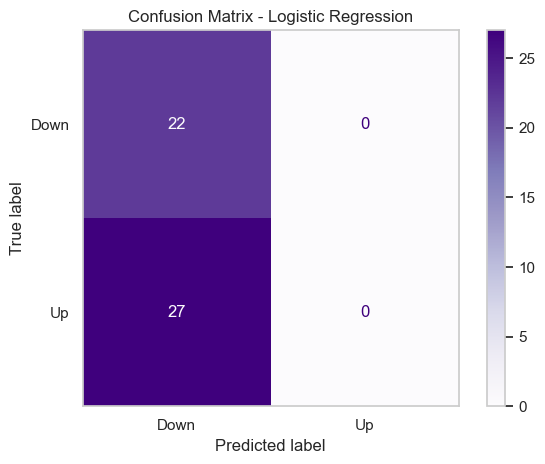

<Figure size 500x400 with 0 Axes>

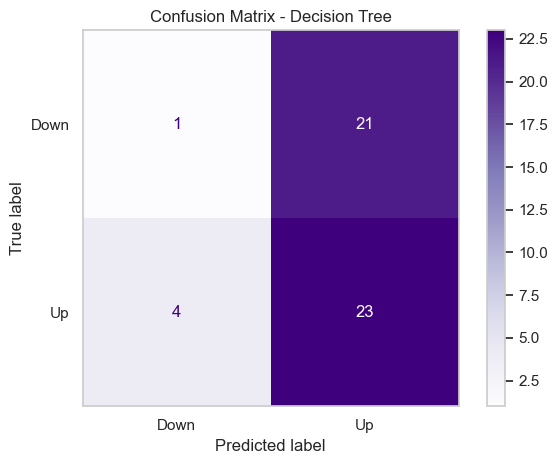

<Figure size 500x400 with 0 Axes>

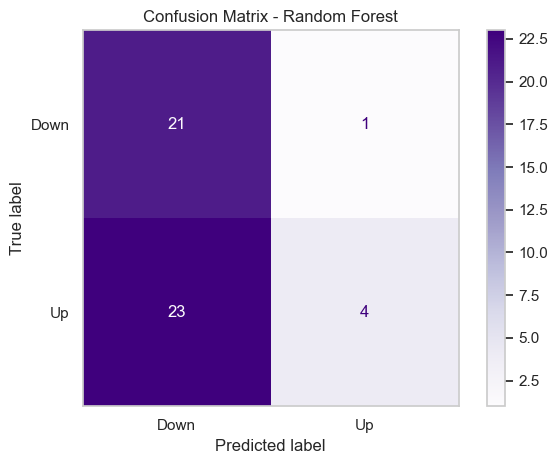

<Figure size 500x400 with 0 Axes>

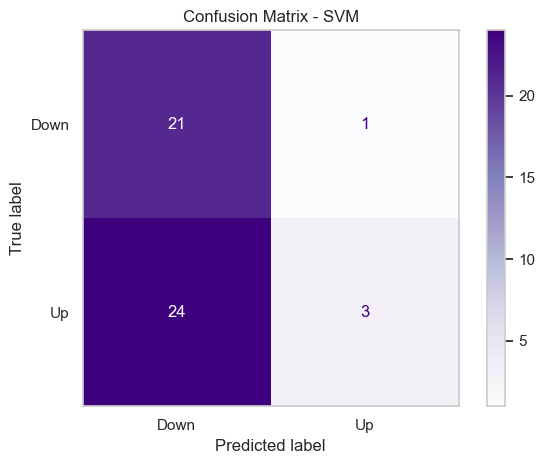

<Figure size 500x400 with 0 Axes>

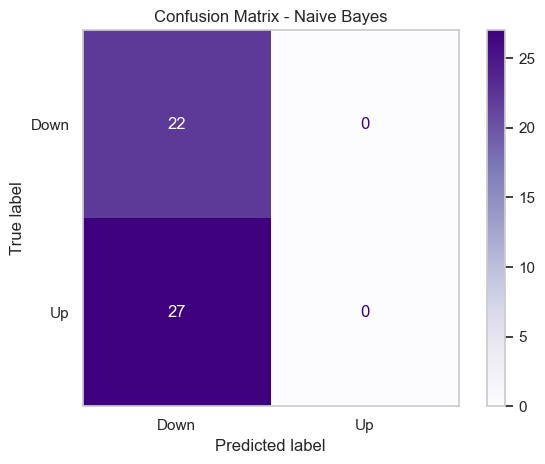

<Figure size 500x400 with 0 Axes>

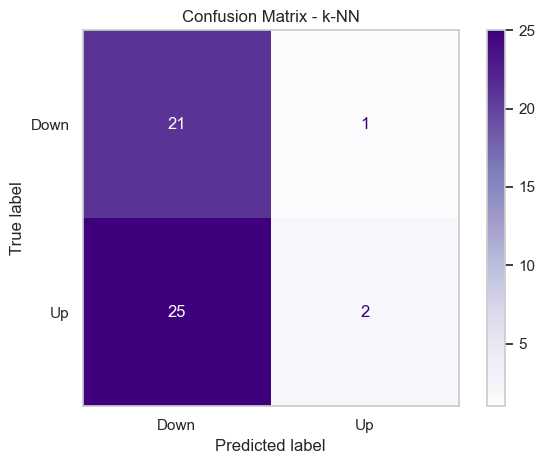

In [102]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot Confusion Matrix for each model
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Down', 'Up'])

    plt.figure(figsize=(5, 4))
    disp.plot(cmap='Purples', values_format='d')
    plt.title(f"Confusion Matrix - {name}")
    plt.grid(False)
    plt.tight_layout()
    plt.show()


In [103]:
import numpy as np
import pandas as pd

In [104]:
# RBI USD TO IND Currency data (01/04/2023 - 31/03/2025)
rbi = pd.read_excel("C:\\Users\\AMAN KUMAR  SINGH\\OneDrive\\Desktop\\NTCC\\data set\\RBI\\BankWise.xlsx")

In [105]:
rbi.head()

,Date,USD
0,28/03/2025,85.5814
1,27/03/2025,85.7610
2,26/03/2025,85.8683
3,25/03/2025,85.7302
4,24/03/2025,85.8318


In [106]:
df = rbi

In [107]:
df.isnull().sum()

Date    0
USD     0
dtype: int64

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 481 entries, 2025-03-28 to 2023-04-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   USD     481 non-null    float64
dtypes: float64(1)
memory usage: 7.5 KB


In [121]:
# Check column names in the DataFrame
print("Column Names:", df.columns.tolist())


Column Names: ['USD']


In [122]:
# Summary statistics
summary_stats = df['USD'].describe()

# Monthly averages
monthly_avg = df.resample('M').mean()

# Month-over-month % change
monthly_change = monthly_avg.pct_change() * 100

# 30-day rolling average
rolling_mean = df['USD'].rolling(window=30).mean()

# Output for report
print("\n🔹 Summary Statistics:\n", summary_stats)
print("\n🔹 Monthly Averages (Last 5 Months):\n", monthly_avg.tail())
print("\n🔹 Monthly % Change (Last 5 Months):\n", monthly_change.tail())
print("\n🔹 30-Day Rolling Mean (Last 5 Days):\n", rolling_mean.tail())



🔹 Summary Statistics:
 count    481.000000
mean      83.682807
std        1.321770
min       81.652600
25%       82.941500
50%       83.357100
75%       83.968500
max       87.585800
Name: USD, dtype: float64

🔹 Monthly Averages (Last 5 Months):
                   USD
Date                 
2024-11-30  84.364361
2024-12-31  84.986229
2025-01-31  86.265748
2025-02-28  87.054750
2025-03-31  86.637663

🔹 Monthly % Change (Last 5 Months):
                  USD
Date                
2024-11-30  0.398488
2024-12-31  0.737121
2025-01-31  1.505561
2025-02-28  0.914618
2025-03-31 -0.479109

🔹 30-Day Rolling Mean (Last 5 Days):
 Date
2023-04-11    82.147433
2023-04-10    82.119527
2023-04-06    82.094680
2023-04-05    82.074450
2023-04-03    82.060733
Name: USD, dtype: float64


C:\Users\AMAN KUMAR  SINGH\AppData\Local\Temp\ipykernel_21852\2650040104.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.resample('M').mean()


In [123]:
print(df.columns.tolist())


['USD']


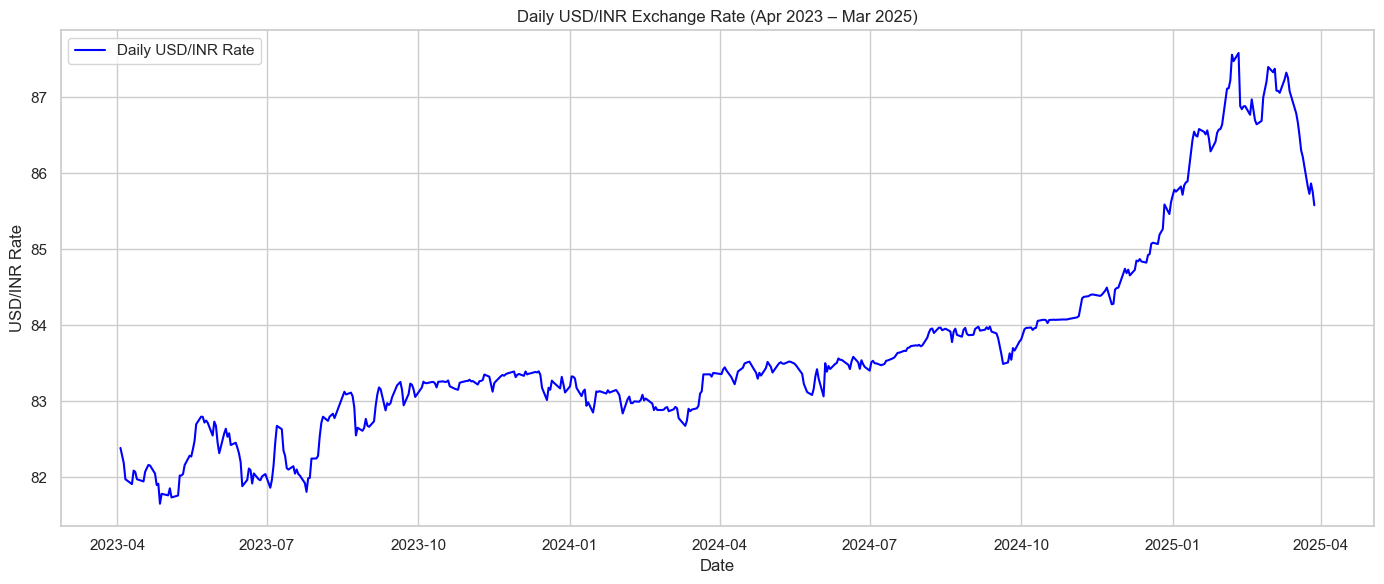

In [124]:
# Line Chart: USD/INR Exchange Rate Over Time
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['USD'], label='Daily USD/INR Rate', color='blue')
plt.title('Daily USD/INR Exchange Rate (Apr 2023 – Mar 2025)')
plt.xlabel('Date')
plt.ylabel('USD/INR Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


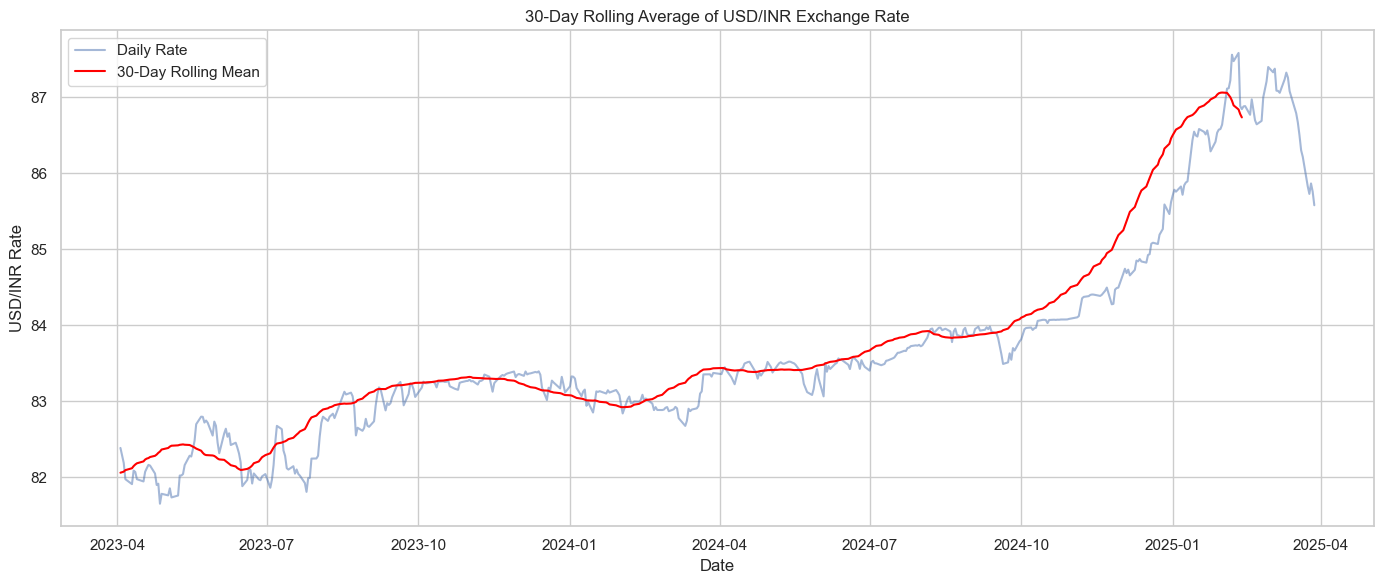

In [125]:
# 30-Day Rolling Average Plot
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['USD'], label='Daily Rate', alpha=0.5)
plt.plot(df.index, df['USD'].rolling(window=30).mean(), label='30-Day Rolling Mean', color='red')
plt.title('30-Day Rolling Average of USD/INR Exchange Rate')
plt.xlabel('Date')
plt.ylabel('USD/INR Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


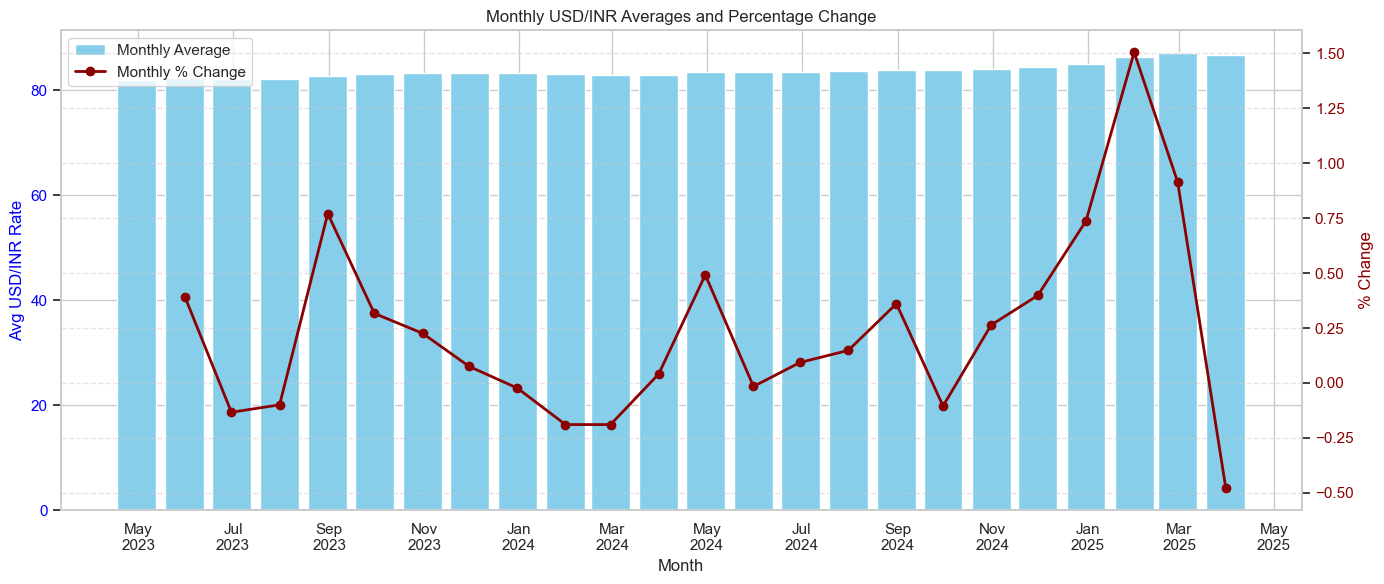

In [126]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Resample to monthly end, compute average and percentage change
monthly_avg = df.resample('ME').mean()
monthly_change = monthly_avg.pct_change() * 100

# Plot setup
fig, ax1 = plt.subplots(figsize=(14, 6))

# Bar chart: Monthly USD/INR Average (left Y-axis)
ax1.bar(monthly_avg.index, monthly_avg['USD'], color='skyblue', width=25, align='center', label='Monthly Average')
ax1.set_ylabel('Avg USD/INR Rate', color='blue')
ax1.set_xlabel('Month')
ax1.tick_params(axis='y', labelcolor='blue')

# Format X-axis to show month and year clearly
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Show every 2 months for clarity
plt.xticks(rotation=0)

# Line chart: Monthly % Change (right Y-axis)
ax2 = ax1.twinx()
ax2.plot(monthly_change.index, monthly_change['USD'], color='darkred', marker='o', linewidth=2, label='Monthly % Change')
ax2.set_ylabel('% Change', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

# Legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Title and layout
plt.title('Monthly USD/INR Averages and Percentage Change')
plt.grid(True, which='both', axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [127]:
df.count

<bound method DataFrame.count of                 USD
Date               
2025-03-28  85.5814
2025-03-27  85.7610
2025-03-26  85.8683
2025-03-25  85.7302
2025-03-24  85.8318
...             ...
2023-04-11  82.0881
2023-04-10  81.9105
2023-04-06  81.9753
2023-04-05  82.1892
2023-04-03  82.3867

[481 rows x 1 columns]>